In [3]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy import stats 

# Hide warning messages in notebook
import warnings
warnings.filterwarnings("ignore")

# File to Load (Remember to Change These)
mouse_drug_data = pd.read_csv("mouse_drug_data.csv")
clinical_trial_data = pd.read_csv("clinicaltrial_data.csv")

# Display the data table for preview
# We can display datas separately by Mouse ID values
mouse_drug_data["Mouse ID"].value_counts().head()
clinical_trial_data["Mouse ID"].value_counts().head()

g989    13
i738    10
g791    10
c282    10
c402    10
Name: Mouse ID, dtype: int64

In [9]:
# Or print both datas inside the window for preview
pd.set_option("display.max_rows", None)
print ("mouse_drug_data:")
display(mouse_drug_data.head())
print ("___________________________________________")
print ("")
print ("clinical_trial_data:")
display(clinical_trial_data.head())

mouse_drug_data:


,Mouse ID,Drug
0,f234,Stelasyn
1,x402,Stelasyn
2,a492,Stelasyn
3,w540,Stelasyn
4,v764,Stelasyn


___________________________________________

clinical_trial_data:


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [12]:
# Merge the data into a single dataset
combinated_data = pd.merge(mouse_drug_data, clinical_trial_data, how="outer", on="Mouse ID")

# Read the Mouse and Drug Data and the Clinical Trial Data
combinated_data.head()

,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2


In [16]:
# Store the Mean "Tumor Volume Data" Grouped by Drug and Timepoint 
tumor_volume_m = combinated_data.groupby(["Drug","Timepoint"]).mean()

# Convert to DataFrame
tumor_volume_mean = pd.DataFrame(tumor_volume_m["Tumor Volume (mm3)"])
tumor_volume_mean.reset_index(level = None, inplace = True)

# Preview DataFrame style with bold Index
tumor_volume_mean.style

# Preview DataFrame
pd.set_option("display.max_rows", None)
tumor_volume_mean.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


In [17]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
tumor_volume = combinated_data.groupby(["Drug", "Timepoint"]).sem()

# Convert to DataFrame
tumor_volume_sem = pd.DataFrame(tumor_volume["Tumor Volume (mm3)"])
tumor_volume_sem.reset_index(level = None, inplace = True)

# Preview DataFrame style with bold Index
tumor_volume_sem.style

# Preview DataFrame
pd.set_option("display.max_rows", None)
tumor_volume_sem.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [18]:
# Minor Data Munging to Re-Format the Data Frames
pivot_tumor_mean = tumor_volume_mean.pivot(index ="Timepoint", columns = 'Drug', values = "Tumor Volume (mm3)")
pivot_tumor_sem = tumor_volume_sem.pivot(index ="Timepoint", columns = 'Drug', values = "Tumor Volume (mm3)")
#pivot_tumor.reset_index(level = None, inplace = True)

pivot_tumor_mean.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


In [19]:
#Lock drugs - Capomulin, Infubinol, Ketapril, Placebo
locked_table = pivot_tumor_mean.loc[:, ["Capomulin", "Infubinol", "Ketapril", "Placebo"]]

# Preview of locked table
locked_table.head()

Drug,Capomulin,Infubinol,Ketapril,Placebo
Timepoint,,,,
0,45.000000,45.000000,45.000000,45.000000
5,44.266086,47.062001,47.389175,47.125589
10,43.084291,49.403909,49.582269,49.423329
15,42.064317,51.296397,52.399974,51.359742
20,40.716325,53.197691,54.920935,54.364417


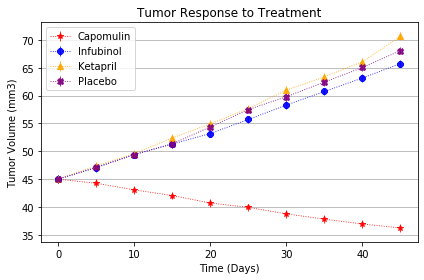

In [20]:
#List timepoints
drug_arg = np.arange(0, 50, 5)

#List Tumor Volume avg by Drug and Timepoint
data_avg = tumor_volume_sem.mean()
tumor_volume_avg = data_avg["Tumor Volume (mm3)"]
tumor_volume_avg

# Generate the Plot (with Error Bars)

plt.errorbar(drug_arg, locked_table["Capomulin"] ,label = "Capomulin", marker = "*", ls = ":",
             lw = .9, color="red", alpha = .9, yerr=tumor_volume_avg)

plt.errorbar(drug_arg, locked_table["Infubinol"], label = "Infubinol", marker = "8", ls = ":",
             lw = .9, color="blue", alpha = .9, yerr=tumor_volume_avg)

plt.errorbar(drug_arg, locked_table["Ketapril"], label = "Ketapril", marker = "^", ls = ":",
             lw = .9, color="orange", alpha = .9, yerr=tumor_volume_avg)

plt.errorbar(drug_arg, locked_table["Placebo"], label = "Placebo", marker = "X", ls = ":",
             lw = .9, color="purple", alpha = .9, yerr=tumor_volume_avg)

#Creating title and labels
plt.title("Tumor Response to Treatment")
plt.xlabel("Time (Days)")
plt.ylabel("Tumor Volume (mm3)")

#Setup horizontal grid lines
ax = plt.axes()        
ax.yaxis.grid(True)

#Formating for loc label
plt.legend(loc="best")
plt.tight_layout()

# Show the Figure
plt.show()

In [21]:
# Save the Figure
plt.tight_layout()
plt.savefig("./data")

<Figure size 432x288 with 0 Axes>

In [22]:
metastatic_sites_data = pd.merge(mouse_drug_data, clinical_trial_data, on="Mouse ID")
# Store the Mean Met. Site Data Grouped by Drug and Timepoint
metastatic_sites = metastatic_sites_data.groupby(["Drug", "Timepoint"]).mean()

# Convert to DataFrame
meta_mean = pd.DataFrame(metastatic_sites["Metastatic Sites"])

# Preview DataFrame
meta_mean.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

In [23]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
meta_static_sites = metastatic_sites_data.groupby(["Drug", "Timepoint"]).sem()

# Convert to DataFrame
meta_sem = pd.DataFrame(meta_static_sites["Metastatic Sites"])

# Preview DataFrame
meta_sem.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621

In [24]:
# Store the Mean "Tumor Volume Data" Grouped by Drug and Timepoint 
metastatic = pd.DataFrame(meta_mean)
metastatic.reset_index(level = None, inplace = True)


pivot_table_met = metastatic.pivot(index ="Timepoint", columns = 'Drug', values = "Metastatic Sites")
#pivot_table_met.reset_index(level = None, inplace = True)

#Preview the formatted table
pivot_table_met.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118


In [25]:
#Lock drugs - Capomulin, Infubinol, Ketapril, Placebo
locked_table_meta = pivot_table_met.loc[:, ["Capomulin", "Infubinol", "Ketapril", "Placebo"]]

# Preview of locked table
locked_table_meta.head()

Drug,Capomulin,Infubinol,Ketapril,Placebo
Timepoint,,,,
0,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.280000,0.304348,0.375000
10,0.320000,0.666667,0.590909,0.833333
15,0.375000,0.904762,0.842105,1.250000
20,0.652174,1.050000,1.210526,1.526316


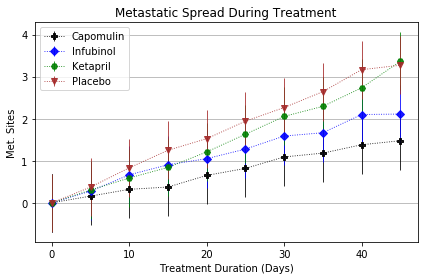

In [26]:
#List timepoints
drug_arg_meta = np.arange(0, 50, 5)

#List Tumor Volume avg by Drug and Timepoint
data_avg_meta = meta_sem.mean()
meta_avg = data_avg_meta["Metastatic Sites"]
meta_avg

# Generate the Plot (with Error Bars)

plt.errorbar(drug_arg_meta, locked_table_meta["Capomulin"] ,label = "Capomulin", marker = "P", ls = ":",
             lw = .9, color="black", alpha = .9, yerr=tumor_volume_avg)

plt.errorbar(drug_arg_meta, locked_table_meta["Infubinol"], label = "Infubinol", marker = "D", ls = ":",
             lw = .9, color="blue", alpha = .9, yerr=tumor_volume_avg)

plt.errorbar(drug_arg_meta, locked_table_meta["Ketapril"], label = "Ketapril", marker = "H", ls = ":",
             lw = .9, color="green", alpha = .9, yerr=tumor_volume_avg)

plt.errorbar(drug_arg_meta, locked_table_meta["Placebo"], label = "Placebo", marker = "v", ls = ":",
             lw = .9, color="brown", alpha = .9, yerr=tumor_volume_avg)

#Creating title and labels
plt.title("Metastatic Spread During Treatment")
plt.xlabel("Treatment Duration (Days)")
plt.ylabel("Met. Sites")

#Setup horizontal grid lines
ax = plt.axes()        
ax.yaxis.grid(True)

#Formating for loc label
plt.legend(loc="best")
plt.tight_layout()

# Show the Figure
plt.show()

In [27]:
#metastatic_sites_data = pd.merge(mouse_drug_data, clinical_trial_data, on="Mouse ID")

# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
mouse_count = metastatic_sites_data.groupby(["Drug", "Timepoint"]).count()["Tumor Volume (mm3)"]

# Convert to DataFrame
mouse_counts = pd.DataFrame({"Mouse Count": mouse_count})

# Preview DataFrame
mouse_counts.reset_index(inplace=True)

In [28]:
mouse_counts.head() #.columns

,Drug,Timepoint,Mouse Count
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [29]:
# Minor Data Munging to Re-Format the Data Frames
mouse_counts_reforma = mouse_counts.pivot(index = "Timepoint", columns ="Drug")["Mouse Count"]

#mouse_counts_reforma = metastatic.pivot(index ="Timepoint", columns = "Drug", values = None)
#pivot_table_met.reset_index(level = None, inplace = True)

#Preview the formatted table
mouse_counts_reforma.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17


In [30]:
#Lock drugs - Capomulin, Infubinol, Ketapril, Placebo
locked_table_mouse = mouse_counts_reforma.loc[:, ["Capomulin", "Infubinol", "Ketapril", "Placebo"]]

# Preview of locked table
locked_table_mouse.head()

#Convert mouse counts to % of starting mice
survival_perc = locked_table_mouse / locked_table_mouse.iloc[0, 0] * 100
survival_perc.head(10)

Drug,Capomulin,Infubinol,Ketapril,Placebo
Timepoint,,,,
0,100.0,100.0,100.0,100.0
5,100.0,100.0,92.0,96.0
10,100.0,84.0,88.0,96.0
15,96.0,84.0,76.0,80.0
20,92.0,80.0,76.0,76.0
25,88.0,72.0,76.0,68.0
30,88.0,68.0,72.0,60.0
35,88.0,48.0,68.0,56.0
40,84.0,40.0,60.0,48.0


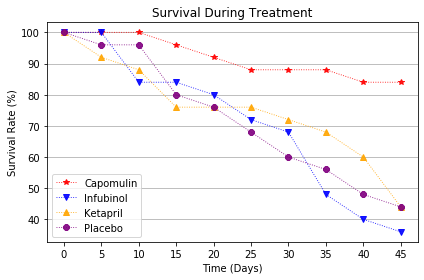

In [31]:
x = 0
ax = plt.subplot(111)


# Set the x axis from 0 to 45 in increments of 5
mouse_arg = np.arange(0, 50, 5)

# Plot the 'mean' list vs. the established x axis with error 
ax.plot(mouse_arg, survival_perc["Capomulin"],label = "Capomulin", marker = "*", ls = ":",
        lw = .9, color="red", alpha = .9)
ax.plot(mouse_arg, survival_perc["Infubinol"], label = "Infubinol", marker = "v", ls = ":",
        lw = .9, color="blue", alpha = .9)
ax.plot(mouse_arg, survival_perc["Ketapril"], label = "Ketapril", marker = "^", ls = ":",
        lw = .9, color="orange", alpha = .9)
ax.plot(mouse_arg, survival_perc["Placebo"], label = "Placebo", marker = "8", ls = ":",
        lw = .9, color="purple", alpha = .9)


tick_locations = [value for value in mouse_arg]
ax.set_xticks(tick_locations, minor=False)

#Creating title and labels
plt.title("Survival During Treatment")
plt.xlabel("Time (Days)")
plt.ylabel("Survival Rate (%)")

#Setup horizontal grid lines
ax = plt.axes()        
ax.yaxis.grid(True)

#Formating for loc label
ax.legend(loc=3)
plt.tight_layout()

# Show the Figure
plt.show()

In [32]:
# Store all Relevant Percent Changes into a Tuple
capo_perc_change = (locked_table["Capomulin"].iloc[9] / locked_table["Capomulin"][0] * 100) - 100
infu_perc_change = (locked_table["Infubinol"].iloc[9] / locked_table["Infubinol"][0] * 100) - 100
keta_perc_change = (locked_table["Ketapril"].iloc[9] / locked_table["Ketapril"][0] * 100) - 100
plac_perc_change = (locked_table["Placebo"].iloc[9] / locked_table["Placebo"][0] * 100) - 100

# List % tumor volume change
y = [capo_perc_change, infu_perc_change, keta_perc_change, plac_perc_change]


# Creating DataFrame and Displaying tumor percent change
tumor = pd.DataFrame({"Drug": locked_table.iloc[9], "Tumor Percent Change": y}).round()

tumor.round()


,Drug,Tumor Percent Change
Drug,,
Capomulin,36.0,-19.0
Infubinol,66.0,46.0
Ketapril,71.0,57.0
Placebo,68.0,51.0


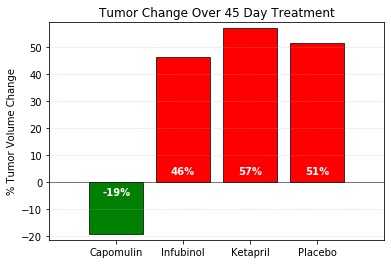

In [33]:
# Bar graph showing tumor growth % over time for each treatment
fig, ax = plt.subplots()
# drug_list values using a list
y = [capo_perc_change, infu_perc_change, keta_perc_change, plac_perc_change]

# Set the x axis from 0 to 45 in increments of 5
x_axis = np.arange(len(y))

# Set the colors of the bars depending on if pos or neg
# Neg % are green
# Pos % are red
colors = []
for item in y:
    if item < 0:
        colors.append('green')
    else:
        colors.append('red')

# Set up the bar graph 
tumor_bar = plt.bar(x_axis, y, color=colors, alpha=1.0, edgecolor='black', lw=0.7)

# Set the plot title and axes titles
plt.title("Tumor Change Over 45 Day Treatment")
plt.ylabel("% Tumor Volume Change")

# plt.xticks() set the location and labels of the ticks on the x axis
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ["Capomulin", "Infubinol", "Ketapril", "Placebo"])


plt.xlim(-1, len(x_axis))
plt.ylim(min(y)-2, max(y)+2)
plt.hlines(0, -1, len(x_axis), alpha=1.0, lw=0.5)

# Add gridlines
#ax = plt.axes()        
#ax.yaxis.grid(True)

plt.grid('on', which='major', axis='y', linestyle='dotted', lw=0.5)


bar_x = [1,2,3,4,5,6,7]
bar_label = "%"
#bar_plot = plt.bar(bar_x,bar_height,tick_label=bar_tick_label)
bar_plot = plt.bar(tumor["Drug"], tumor["Tumor Percent Change"])

# Set up labels with the percentage change for each bar

def autolabel(rects):
    for x, rect in enumerate(rects):
        height = int(y[x]) #height = rect.get_height()
        if height >= 0:
            plt.text(rect.get_x() + rect.get_width()/2., 2, '%s%%'%(int(height)), 
                ha='center', va='bottom', color='white', weight='bold') #int(rect.get_height())
        else:
            plt.text(rect.get_x() + rect.get_width()/2., -2, '%s%%'%(int(height)),
                ha='center', va='top', color='white', weight='bold')          

autolabel(tumor_bar)
# Show the resulting scatter plot
plt.show()